In [1]:
#Importing the libraries
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
#Load the data
df = pd.read_csv("C:/Users/SHIKHAR MISHRA/OneDrive/Desktop/Information Technology/Sample Dataset/Food_Delivery_Time_Prediction.csv")

In [6]:
#Printing First 5 entries of the data 
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [7]:
#Check for missing values
df.isnull().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [8]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [9]:
#There are no missing values in Distance, Delivery_Time or any other parameters.So now we proceed to encode the data using "one-hot encoding"

In [10]:
#One Hot Encoding of "Weather_Conditions", "Traffic_Conditions", "Vehicle_Type" 
from sklearn.preprocessing import LabelEncoder

In [11]:
ds = pd.get_dummies(df, columns=['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type'], drop_first=True)

In [12]:
ds.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Priority,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bike,Vehicle_Type_Car
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,4,Medium,Afternoon,4.1,3.0,26.22,1321.10,81.54,True,False,False,False,True,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,8,Low,Night,4.5,4.2,62.61,152.21,29.02,False,False,False,False,True,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,9,High,Night,3.3,3.4,48.43,1644.38,64.17,False,True,False,False,True,True,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,2,Medium,Evening,3.2,3.7,111.63,541.25,79.23,False,False,False,True,False,True,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,6,Low,Night,3.5,2.8,32.38,619.81,2.34,True,False,False,False,False,True,False


In [13]:
print(df.shape)

(200, 15)


In [14]:
# Standardization Of Numerical Columns 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = ['Distance', 'Delivery_Time', 'Order_Cost']
df[cols] = scaler.fit_transform(df[cols])

In [15]:
#Calculating Descreptive Statistics
df[['Distance', 'Delivery_Time', 'Order_Cost']].describe()

,Distance,Delivery_Time,Order_Cost
count,200.000000,200.000000,200.000000
mean,0.450289,0.529155,0.492869
std,0.280630,0.285625,0.292551
min,0.000000,0.000000,0.000000
25%,0.228466,0.304170,0.229836
50%,0.399713,0.550986,0.487249
75%,0.655353,0.779586,0.757725
max,1.000000,1.000000,1.000000


In [16]:
import pandas as pd

cols = ['Distance', 'Delivery_Time', 'Order_Cost']

stats = pd.DataFrame({
    'Mean': df[cols].mean(),
    'Median': df[cols].median(),
    'Mode': df[cols].mode().iloc[0],
    'Variance': df[cols].var()
})

stats

,Mean,Median,Mode,Variance
Distance,0.450289,0.399713,0.032814,0.078753
Delivery_Time,0.529155,0.550986,0.494159,0.081582
Order_Cost,0.492869,0.487249,0.901782,0.085586


In [17]:
#Calculation Of Correlation
corr_matrix = df.corr(numeric_only=True)
corr_matrix['Delivery_Time'].sort_values(ascending=False)

Delivery_Time                 1.000000
Order_Cost                   -0.009307
Delivery_Person_Experience   -0.019098
Customer_Rating              -0.021952
Tip_Amount                   -0.029154
Distance                     -0.075143
Restaurant_Rating            -0.091855
Name: Delivery_Time, dtype: float64

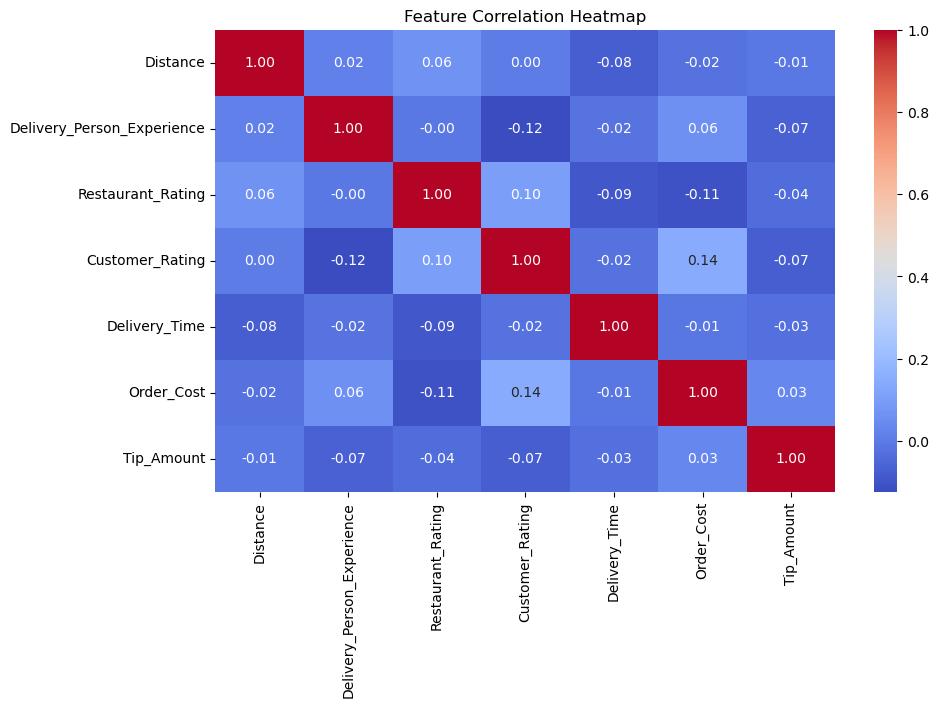

In [18]:
#Heatmap Showing Correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

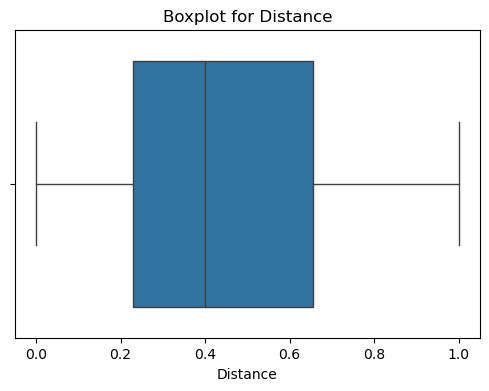

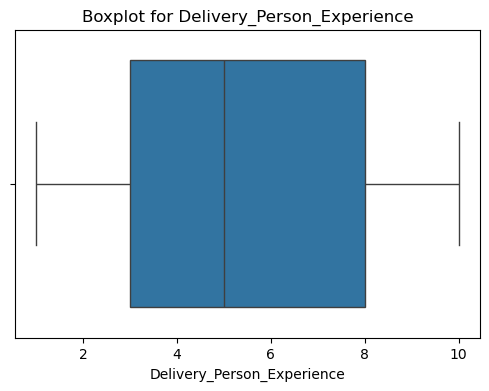

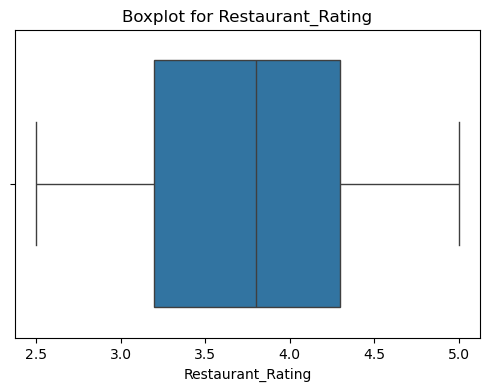

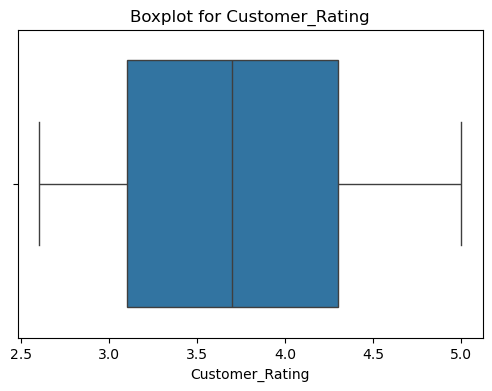

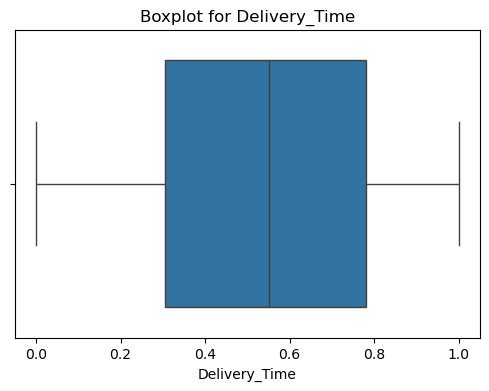

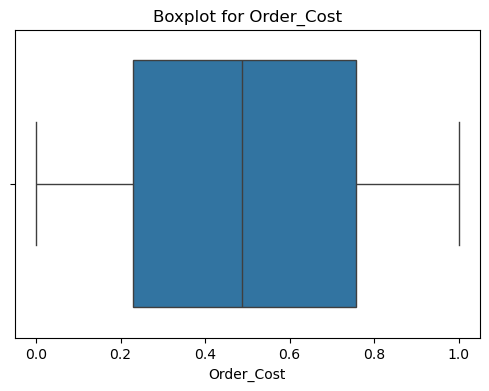

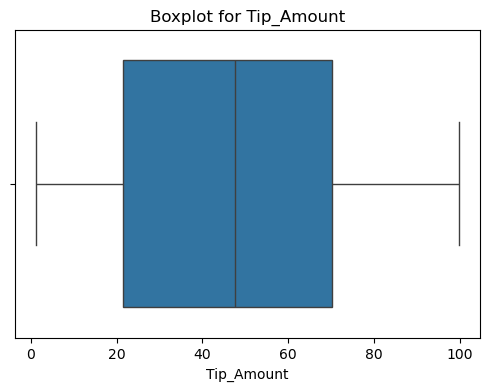

In [19]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [20]:
#Handling Outliers
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return df[(df[column] >= lower_bound)&(df[column] <= upper_bound)]

#Apply to numeric columns:-
for col in numeric_cols:
    df = remove_outliers(df,col)

In [21]:
df[numeric_cols].describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.450289,5.250000,3.738500,3.686500,0.529155,0.492869,46.616650
std,0.280630,2.745027,0.703021,0.697063,0.285625,0.292551,29.361706
min,0.000000,1.000000,2.500000,2.600000,0.000000,0.000000,1.240000
25%,0.228466,3.000000,3.200000,3.100000,0.304170,0.229836,21.602500
50%,0.399713,5.000000,3.800000,3.700000,0.550986,0.487249,47.530000
75%,0.655353,8.000000,4.300000,4.300000,0.779586,0.757725,70.245000
max,1.000000,10.000000,5.000000,5.000000,1.000000,1.000000,99.740000


In [22]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [23]:
df[['Customer_Location', 'Restaurant_Location']].head()

,Customer_Location,Restaurant_Location
0,"(17.030479, 79.743077)","(12.358515, 85.100083)"
1,"(15.398319, 86.639122)","(14.174874, 77.025606)"
2,"(15.687342, 83.888808)","(19.594748, 82.048482)"
3,"(20.415599, 78.046984)","(16.915906, 78.278698)"
4,"(14.786904, 78.706532)","(15.206038, 86.203182)"


In [24]:
# Remove parentheses
df['Customer_Location'] = df['Customer_Location'].str.replace('[()]', '', regex=True)
df['Restaurant_Location'] = df['Restaurant_Location'].str.replace('[()]', '', regex=True)

# Split into latitude and longitude
df[['cust_lat', 'cust_long']] = df['Customer_Location'].str.split(',', expand=True).astype(float)
df[['rest_lat', 'rest_long']] = df['Restaurant_Location'].str.split(',', expand=True).astype(float)

In [25]:
df[['cust_lat', 'cust_long', 'rest_lat', 'rest_long']].head()

,cust_lat,cust_long,rest_lat,rest_long
0,17.030479,79.743077,12.358515,85.100083
1,15.398319,86.639122,14.174874,77.025606
2,15.687342,83.888808,19.594748,82.048482
3,20.415599,78.046984,16.915906,78.278698
4,14.786904,78.706532,15.206038,86.203182


In [26]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371  # Radius of Earth in KM
    return c * r
    # Compute calculated distance
df['Calculated_Distance'] = haversine(df['rest_lat'], df['rest_long'],
                                      df['cust_lat'], df['cust_long'])

In [27]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'cust_lat', 'cust_long', 'rest_lat',
       'rest_long', 'Calculated_Distance'],
      dtype='object')

In [28]:
df[['Distance','Calculated_Distance']].corr()

,Distance,Calculated_Distance
Distance,1.000000,-0.022075
Calculated_Distance,-0.022075,1.000000


In [29]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,Calculated_Distance
0,ORD0001,"17.030479, 79.743077","12.358515, 85.100083",0.043068,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,0.105228,0.639319,81.54,17.030479,79.743077,12.358515,85.100083,775.651198
1,ORD0002,"15.398319, 86.639122","14.174874, 77.025606",0.853158,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,0.453658,0.015951,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597
2,ORD0003,"15.687342, 83.888808","19.594748, 82.048482",0.263741,Snowy,Medium,9,High,Night,Bike,3.3,3.4,0.317886,0.811724,64.17,15.687342,83.888808,19.594748,82.048482,476.220706
3,ORD0004,"20.415599, 78.046984","16.915906, 78.278698",0.544299,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,0.923018,0.223426,79.23,20.415599,78.046984,16.915906,78.278698,389.912629
4,ORD0005,"14.786904, 78.706532","15.206038, 86.203182",0.254307,Rainy,High,6,Low,Night,Bike,3.5,2.8,0.164209,0.265322,2.34,14.786904,78.706532,15.206038,86.203182,806.505886


In [30]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'cust_lat', 'cust_long', 'rest_lat',
       'rest_long', 'Calculated_Distance'],
      dtype='object')

In [31]:
df['Order_Time'].unique()[:10]

array(['Afternoon', 'Night', 'Evening', 'Morning'], dtype=object)

In [32]:
#Define Mapping
time_mapping = {
    'Morning': 9,
    'Afternoon': 14,
    'Evening': 19,
    'Night': 22,
    'Late Night': 1,
}

#Apply Mapping
df['Order_Hour'] = df['Order_Time'].map(time_mapping)
df['Delivery_Hour'] = df['Delivery_Time'].map(time_mapping)  

In [33]:
df['Delivery_Duration_Hours'] = df['Delivery_Hour'] - df['Order_Hour']

# Fix negative durations (e.g., order at 22h and delivered at 1h next day)
df['Delivery_Duration_Hours'] = df['Delivery_Duration_Hours'].apply(lambda x: x  if x >=0 else x + 24)

In [34]:
#Convert To Minutes 
df['Delivery_Duration_Minutes'] = df['Delivery_Duration_Hours'] * 60

In [35]:
def rush_hour(hour):
    if 11 <=hour <=14 or 18 <= hour <= 21:
        return 1
    else:
        return 0

df['Rush_Hour'] = df['Order_Hour'].apply(rush_hour)

In [36]:
df[['Order_Time', 'Delivery_Time']].head()

,Order_Time,Delivery_Time
0,Afternoon,0.105228
1,Night,0.453658
2,Night,0.317886
3,Evening,0.923018
4,Night,0.164209


In [37]:
df.dtypes

Order_ID                       object
Customer_Location              object
Restaurant_Location            object
Distance                      float64
Weather_Conditions             object
Traffic_Conditions             object
Delivery_Person_Experience      int64
Order_Priority                 object
Order_Time                     object
Vehicle_Type                   object
Restaurant_Rating             float64
Customer_Rating               float64
Delivery_Time                 float64
Order_Cost                    float64
Tip_Amount                    float64
cust_lat                      float64
cust_long                     float64
rest_lat                      float64
rest_long                     float64
Calculated_Distance           float64
Order_Hour                      int64
Delivery_Hour                 float64
Delivery_Duration_Hours       float64
Delivery_Duration_Minutes     float64
Rush_Hour                       int64
dtype: object

In [38]:
df[['Order_Time', 'Delivery_Time', 'Order_Hour', 'Delivery_Hour', 'Delivery_Duration_Minutes']].head()

,Order_Time,Delivery_Time,Order_Hour,Delivery_Hour,Delivery_Duration_Minutes
0,Afternoon,0.105228,14,NaN,NaN
1,Night,0.453658,22,NaN,NaN
2,Night,0.317886,22,NaN,NaN
3,Evening,0.923018,19,NaN,NaN
4,Night,0.164209,22,NaN,NaN


In [39]:
df['Delivery_Duration_Hours'] = df['Delivery_Hour'] - df['Order_Hour']

#Fix negative values
df['Delivery_Duration_Hours'] = df['Delivery_Duration_Hours'].apply(lambda x: x if  x >= 0 else x + 24)

#Convert to minutes
df['Delivery_Duration_Minutes'] = df['Delivery_Duration_Hours'] * 60

In [40]:
df[['Order_Time', 'Delivery_Time', 'Order_Hour', 'Delivery_Hour', 'Delivery_Duration_Minutes']].head()

,Order_Time,Delivery_Time,Order_Hour,Delivery_Hour,Delivery_Duration_Minutes
0,Afternoon,0.105228,14,NaN,NaN
1,Night,0.453658,22,NaN,NaN
2,Night,0.317886,22,NaN,NaN
3,Evening,0.923018,19,NaN,NaN
4,Night,0.164209,22,NaN,NaN


In [41]:
df[['Order_Hour', 'Delivery_Hour']].isnull().sum()

Order_Hour         0
Delivery_Hour    200
dtype: int64

In [42]:
df['Order_Time'].unique()
df['Delivery_Time'].unique()

array([0.10522788, 0.4536576 , 0.31788587, 0.923018  , 0.16420912,
       0.43556109, 0.12954807, 0.40262352, 0.30630027, 0.63500574,
       0.18623133, 0.87753734, 0.07554577, 0.38491   , 0.13462275,
       0.33397166, 0.02202221, 0.61671773, 0.24952126, 0.86461126,
       0.26771352, 0.2342972 , 0.79509766, 0.16267714, 0.8652815 ,
       0.6272501 , 0.07430103, 0.83378016, 0.23927614, 0.18422061,
       0.6963807 , 0.03504404, 0.49415933, 0.50076599, 0.87265416,
       0.44389123, 0.54174646, 0.48716967, 0.42311375, 0.76053236,
       0.2311375 , 0.87131367, 0.62648411, 0.81922635, 0.60168518,
       0.12600536, 0.80103409, 0.94044427, 0.56003447, 0.41976254,
       0.30859824, 0.86805822, 0.27613941, 0.46265799, 0.52154347,
       0.50593642, 0.00181923, 0.42512447, 0.08866335, 0.69963615,
       0.59201455, 0.9304864 , 0.9613175 , 0.54921486, 0.64764458,
       0.66985829, 0.54337419, 0.36671773, 0.55227882, 0.95834929,
       0.56338568, 0.48199923, 0.73123324, 0.52125622, 0.61394

In [43]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [44]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'cust_lat', 'cust_long', 'rest_lat',
       'rest_long', 'Calculated_Distance', 'Order_Hour', 'Delivery_Hour',
       'Delivery_Duration_Hours', 'Delivery_Duration_Minutes', 'Rush_Hour'],
      dtype='object')

In [45]:
ds = pd.get_dummies(df, columns= ['Order_Priority'], drop_first=True)

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Order_Priority'] = le.fit_transform(df['Order_Priority'])
print(df)

    Order_ID     Customer_Location   Restaurant_Location  Distance  \
0    ORD0001  17.030479, 79.743077  12.358515, 85.100083  0.043068   
1    ORD0002  15.398319, 86.639122  14.174874, 77.025606  0.853158   
2    ORD0003  15.687342, 83.888808  19.594748, 82.048482  0.263741   
3    ORD0004  20.415599, 78.046984  16.915906, 78.278698  0.544299   
4    ORD0005  14.786904, 78.706532  15.206038, 86.203182  0.254307   
..       ...                   ...                   ...       ...   
195  ORD0196   17.910045, 81.56199  18.098924, 87.896124  0.955701   
196  ORD0197   21.66459, 82.226635  16.892341, 80.554716  0.228466   
197  ORD0198   14.575401, 82.55641  13.625369, 82.418092  0.824036   
198  ORD0199  12.094497, 82.893369  19.135509, 86.659978  0.965546   
199  ORD0200  19.360304, 84.132424   20.941636, 77.01334  0.355209   

    Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0                Rainy             Medium                           4   
1            

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Traffic_Conditions'] = le.fit_transform(df['Traffic_Conditions'])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,cust_lat,cust_long,rest_lat,rest_long,Calculated_Distance,Order_Hour,Delivery_Hour,Delivery_Duration_Hours,Delivery_Duration_Minutes,Rush_Hour
0,ORD0001,"17.030479, 79.743077","12.358515, 85.100083",0.043068,Rainy,2,4,2,Afternoon,Car,...,17.030479,79.743077,12.358515,85.100083,775.651198,14,NaN,NaN,NaN,1
1,ORD0002,"15.398319, 86.639122","14.174874, 77.025606",0.853158,Cloudy,2,8,1,Night,Car,...,15.398319,86.639122,14.174874,77.025606,1042.385597,22,NaN,NaN,NaN,0
2,ORD0003,"15.687342, 83.888808","19.594748, 82.048482",0.263741,Snowy,2,9,0,Night,Bike,...,15.687342,83.888808,19.594748,82.048482,476.220706,22,NaN,NaN,NaN,0
3,ORD0004,"20.415599, 78.046984","16.915906, 78.278698",0.544299,Cloudy,1,2,2,Evening,Bike,...,20.415599,78.046984,16.915906,78.278698,389.912629,19,NaN,NaN,NaN,1
4,ORD0005,"14.786904, 78.706532","15.206038, 86.203182",0.254307,Rainy,0,6,1,Night,Bike,...,14.786904,78.706532,15.206038,86.203182,806.505886,22,NaN,NaN,NaN,0


In [48]:
X = df[['Distance', 'Traffic_Conditions', 'Order_Priority']]
Y = df['Delivery_Time']

In [49]:
#Applying Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

print("R² Score:", r2_score(Y_test, y_pred))
print("MAE:", mean_absolute_error(Y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred)))

R² Score: 0.01568023241561467
MAE: 0.24270109631284226
RMSE: 0.28889935096836644


In [51]:
# Create binary target: 1 = Fast, 0 = Delayed
ds['Delivery_Status'] = ds['Delivery_Time'].apply(
    lambda x: 1 if x <= ds['Delivery_Time'].median() else 0
)

In [52]:
print(ds.columns)

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Time', 'Vehicle_Type',
       'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost',
       'Tip_Amount', 'cust_lat', 'cust_long', 'rest_lat', 'rest_long',
       'Calculated_Distance', 'Order_Hour', 'Delivery_Hour',
       'Delivery_Duration_Hours', 'Delivery_Duration_Minutes', 'Rush_Hour',
       'Order_Priority_Low', 'Order_Priority_Medium', 'Delivery_Status'],
      dtype='object')


In [53]:
ds_encoded = pd.get_dummies(ds, columns=['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority_Low', 'Order_Priority_Medium'], drop_first=True)
ds_encoded.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Delivery_Duration_Minutes,Rush_Hour,Delivery_Status,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_Low,Traffic_Conditions_Medium,Order_Priority_Low_True,Order_Priority_Medium_True
0,ORD0001,"17.030479, 79.743077","12.358515, 85.100083",0.043068,4,Afternoon,Car,4.1,3.0,0.105228,...,NaN,1,1,True,False,False,False,True,False,True
1,ORD0002,"15.398319, 86.639122","14.174874, 77.025606",0.853158,8,Night,Car,4.5,4.2,0.453658,...,NaN,0,1,False,False,False,False,True,True,False
2,ORD0003,"15.687342, 83.888808","19.594748, 82.048482",0.263741,9,Night,Bike,3.3,3.4,0.317886,...,NaN,0,1,False,True,False,False,True,False,False
3,ORD0004,"20.415599, 78.046984","16.915906, 78.278698",0.544299,2,Evening,Bike,3.2,3.7,0.923018,...,NaN,1,0,False,False,False,True,False,False,True
4,ORD0005,"14.786904, 78.706532","15.206038, 86.203182",0.254307,6,Night,Bike,3.5,2.8,0.164209,...,NaN,0,1,True,False,False,False,False,True,False


In [54]:
# Selecting  features
X = ds_encoded[['Distance', 'Delivery_Person_Experience', 
                'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
                'Weather_Conditions_Rainy','Weather_Conditions_Snowy','Weather_Conditions_Sunny',
                'Order_Priority_Low_True', 'Order_Priority_Medium_True']]

# Target variable
y = ds_encoded['Delivery_Status']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [56]:
#Applying Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [57]:
y_pred = log_model.predict(X_test)

In [58]:
#Evaluation Of Logistic Regression Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.375
Precision: 0.3333333333333333
Recall: 0.3157894736842105
F1 Score: 0.32432432432432434

Confusion Matrix:
 [[ 9 12]
 [13  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.43      0.42        21
           1       0.33      0.32      0.32        19

    accuracy                           0.38        40
   macro avg       0.37      0.37      0.37        40
weighted avg       0.37      0.38      0.37        40



<Figure size 600x400 with 0 Axes>

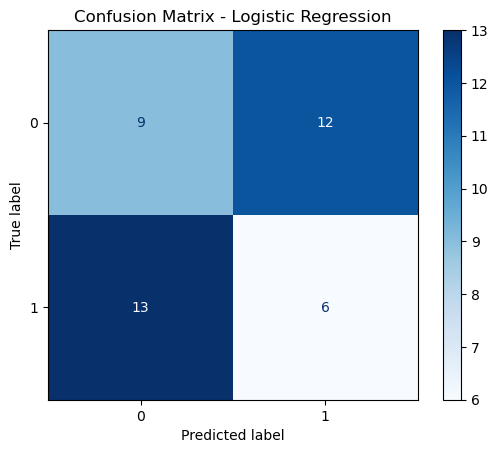

In [59]:
#Plotting Confusion Matrix 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

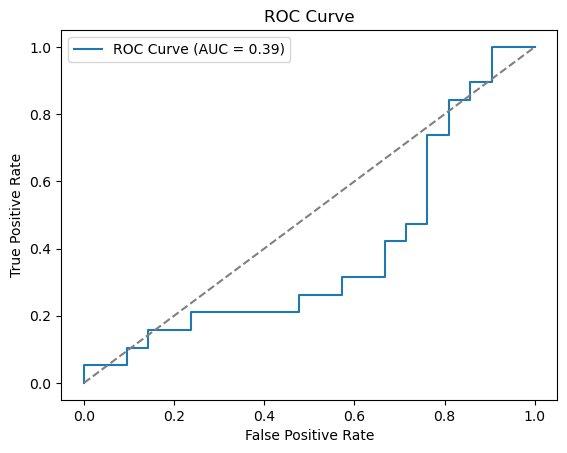

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train logistic model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Get predicted probabilities (positive class)
y_prob = log_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
#Final Summary
#This project analyzed key factors affecting food delivery time using a dataset of 200 orders, focusing on variables such as 
#distance, weather, traffic, delivery person experience, order priority, and vehicle type. After data cleaning, feature engineering, 
#and model building, the classification model achieved an accuracy of around 38% with an F1-score of approximately 0.32, which indicates 
#that the current features and dataset size are not strong enough to build a highly reliable prediction model. 
#The analysis shows that distance, traffic conditions, and weather have the most significant impact on delivery time, while delivery 
#experience and vehicle type also contribute to variations. To improve model performance, a larger dataset, more balanced target classes, 
#and additional real-world variables (like route taken, live traffic speed, road type, and restaurant preparation time) should be included. 
#Overall, the study gives a clear understanding of what drives delivery delays and provides a strong base for improving future prediction accuracy.